In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', rc={
    'figure.figsize': (8, 6),
    'grid.linestyle': '--',
    'grid.color': 'lightgray',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.edgecolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.bottom': True,
    'ytick.left': True
})


Text(0.5, 0, 'Height (in)')

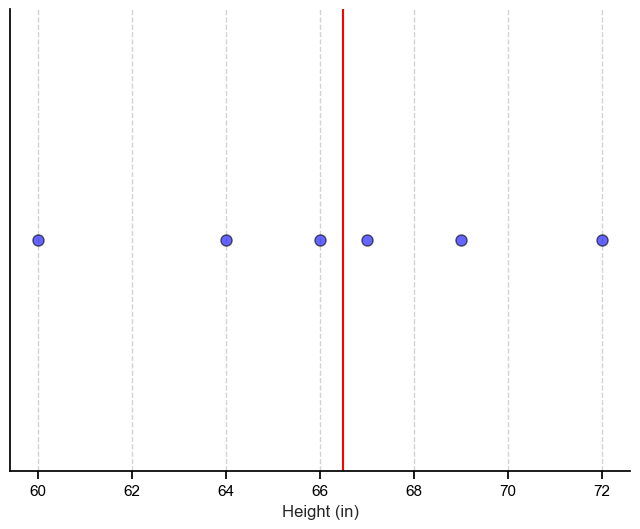

In [59]:
height = [69, 67, 66, 60, 72, 64]

sns.stripplot(x=height, 
              jitter=False, 
              size=8, 
              color='blue', 
              alpha=0.6,
              edgecolor='black', 
              linewidth=1)

plt.axvline(np.median(height), color='red')
plt.ylabel('')
plt.yticks([])
plt.xlabel('Height (in)')

Text(0.5, 0, 'Height (in)')

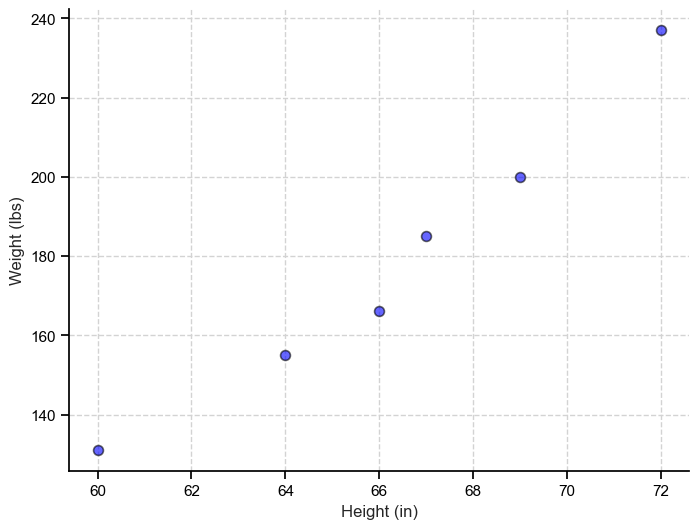

In [3]:
weight = [200, 185, 166, 131, 237, 155]

sns.scatterplot(x=height, 
                y=weight, 
                s=50, 
                color='blue', 
                alpha=0.6, 
                legend=False, 
                edgecolor='black', 
                linewidth=1.2)

plt.ylabel('Weight (lbs)')
plt.xlabel('Height (in)')

In [4]:
import canopy
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


/Users/dickinsonjo/miniconda3/envs/.stats/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
adat = canopy.read_adat(path_or_buf="../data/soma_data/example_data_v4.1_plasma.adat")

df = adat.pick_meta(axis=0, names=["SampleType"]).pick_meta(axis=1, names=['SeqId']).reset_index()
df.head()

SeqId,SampleType,10000-28,10001-7,10003-15,10006-25,10008-43,10010-10,10011-65,10012-5,10013-34,...,9984-12,9986-14,9987-30,9989-12,9991-112,9993-11,9994-217,9995-6,9997-12,9999-1
0,Sample,515.3,570.3,136.0,579.5,453.4,322.9,2406.3,1008.8,376.4,...,488.2,10039.3,491.9,443.3,420.4,860.4,1287.4,2900.2,22189.9,2363.3
1,Sample,455.8,737.7,352.6,565.4,405.4,276.4,2276.2,1478.6,553.4,...,597.4,1103.7,539.8,380.9,614.5,999.0,1413.7,6080.8,44761.7,3467.0
2,Sample,474.7,768.8,170.1,698.7,488.1,304.7,2021.3,1097.4,399.2,...,497.1,5503.1,464.5,468.5,569.0,903.0,1322.5,3146.3,28548.0,2994.2
3,Sample,542.1,881.2,150.8,602.4,425.1,299.1,2573.5,1226.4,405.6,...,517.5,1886.8,506.7,414.7,508.2,1019.1,1268.4,4136.6,28940.1,3907.5
4,Calibrator,875.0,383.8,218.1,804.0,670.2,603.0,3690.5,1917.0,678.2,...,785.5,4782.5,1139.7,569.9,1768.5,1740.3,2163.2,2298.2,7074.6,1743.0


In [30]:
# PCA
scaled_data = StandardScaler().fit_transform(df.iloc[:, 1:-1]) # First row is categorical data

pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_data)

In [31]:
cols = ['Component_' + str(x) for x in range(1, 11)]

pca_df = pd.DataFrame(pca_data, columns=cols)
pca_df['SampleType'] = df.SampleType
pca_df.head()

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,SampleType
0,5.533620,6.388061,-11.491966,8.845446,1.440683,-7.659727,3.130440,10.919909,0.542758,7.657302,Sample
1,-23.207949,38.175858,16.478028,-7.896985,16.312543,4.562466,-9.858897,23.749631,16.840084,2.633806,Sample
2,2.870066,10.669261,-10.180054,4.773446,1.666368,-4.471299,2.406823,3.304476,-0.386536,7.876667,Sample
3,-0.634142,16.108906,-1.891945,-2.134709,1.797478,-0.847684,6.793641,3.460605,2.286982,1.873369,Sample
4,-60.256260,-36.983857,30.620863,2.516903,-1.219286,-12.569654,0.250325,-1.827474,-1.543402,2.403690,Calibrator


<Axes: xlabel='Component_1', ylabel='Component_2'>

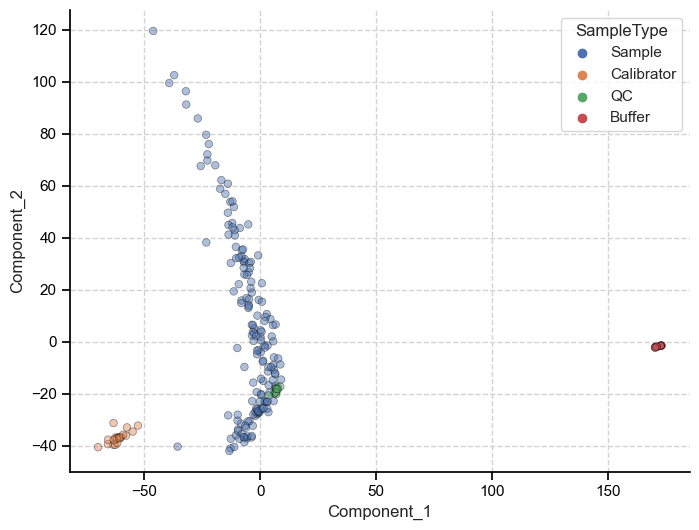

In [57]:
sns.scatterplot(data=pca_df,
                x='Component_1', 
                y='Component_2', 
                s=30, 
                alpha=0.45, 
                edgecolor='black',
                hue='SampleType', 
                linewidth=0.5)

In [45]:
# tSNE
tsne = TSNE(n_components=2, perplexity=15, random_state=42)

X_tsne = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(X_tsne, columns=cols[:2])
tsne_df['SampleType'] = df.SampleType
tsne_df.head()

,Component_1,Component_2,SampleType
0,-1.169742,1.272403,Sample
1,2.892353,8.687362,Sample
2,-0.126922,3.127615,Sample
3,0.782419,4.273826,Sample
4,17.638151,-19.256102,Calibrator


<Axes: xlabel='Component_1', ylabel='Component_2'>

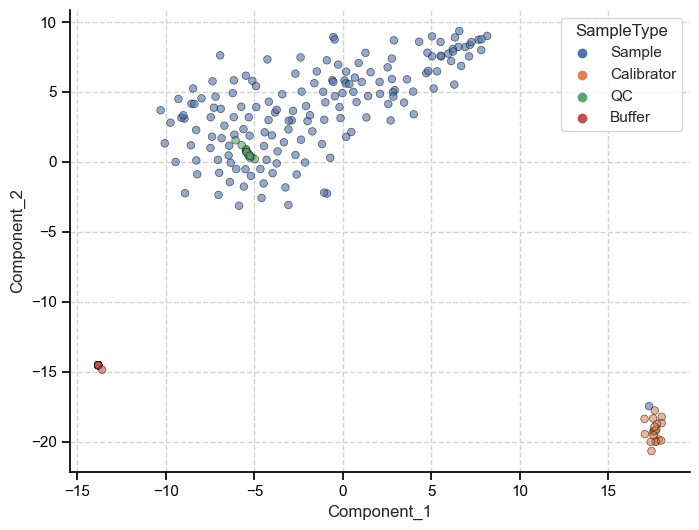

In [54]:
sns.scatterplot(data=tsne_df,
                x='Component_1', 
                y='Component_2', 
                s=30, 
                hue='SampleType', 
                alpha=0.6, 
                edgecolor='black', 
                linewidth=0.5)

In [47]:
# UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(scaled_data)

umap_df = pd.DataFrame(X_umap, columns=cols[:2])
umap_df['SampleType'] = df.SampleType
umap_df.head()

/Users/dickinsonjo/miniconda3/envs/.stats/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,Component_1,Component_2,SampleType
0,13.291088,1.785774,Sample
1,11.007267,3.140337,Sample
2,13.314041,2.859493,Sample
3,12.725242,3.046964,Sample
4,-7.517048,18.696585,Calibrator


<Axes: xlabel='Component_1', ylabel='Component_2'>

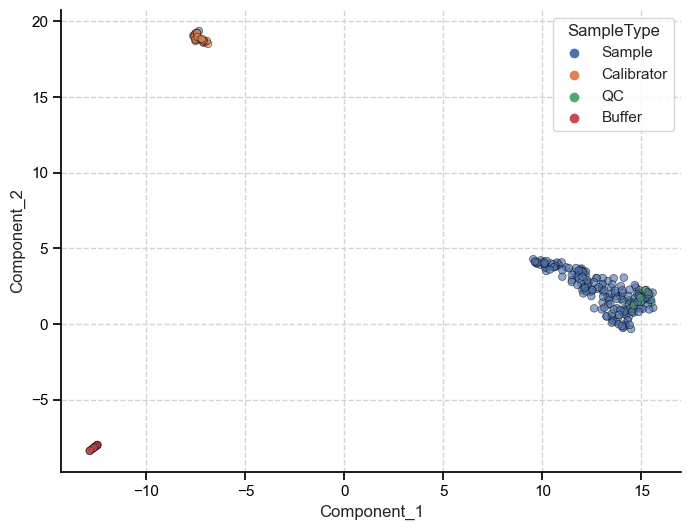

In [55]:
sns.scatterplot(data=umap_df,
                x='Component_1', 
                y='Component_2', 
                s=30, 
                alpha=0.6, 
                edgecolor='black',
                hue='SampleType', 
                linewidth=0.5)